<a href="https://colab.research.google.com/github/yoonzerolee/bandaru-lab-inspired-ai/blob/main/bandaru_lab_inspired_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#cell 1
!pip install tensorflow pandas numpy scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [14]:
import pandas as pd
print("Attempting to load data from Google Drive...")

# --- PASTE YOUR COPIED PATHS HERE ---
# It will look something like '/content/drive/MyDrive/colab_data/mitbih_train.csv'

train_path = '/content/drive/MyDrive/colab_data/mitbih_train.csv'
test_path = '/content/drive/MyDrive/colab_data/mitbih_test.csv'
# (Remember to go back and "Copy path" for the test.csv file too!)

# ----------------------------------------

# Load the files from Google Drive
train_df = pd.read_csv(train_path, header=None)
test_df = pd.read_csv(test_path, header=None)

print("Successfully loaded data!")
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Attempting to load data from Google Drive...
Successfully loaded data!
Training data shape: (87554, 188)
Test data shape: (21892, 188)


In [15]:
#cell 3 originally 2 (also added)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#cell 4 originally 3 (added)

print("--- DEBUGGING CELL ---")
try:
    print("Shape of train_df (from Cell 2):", train_df.shape)

    print("\nFirst 5 rows of train_df (to see its structure):")
    print(train_df.head())

    # Let's re-create y_train right here
    print("\nCreating y_train_debug...")
    y_train_debug = train_df.iloc[:, -1].values

    print("Shape of y_train_debug:", y_train_debug.shape)

    # This is the most important part.
    print("\nUnique values found in y_train_debug and their counts:")
    unique_vals, counts = np.unique(y_train_debug, return_counts=True)
    print("Values:", unique_vals)
    print("Counts:", counts)

except Exception as e:
    print("\n!!! AN ERROR OCCURRED DURING DEBUGGING !!!")
    print(e)
    print("\n'train_df' variable might not exist. Please re-run Cell 1 and Cell 2 and try this debug cell again.")

print("--- END DEBUGGING ---")

--- DEBUGGING CELL ---
Shape of train_df (from Cell 2): (87554, 188)

First 5 rows of train_df (to see its structure):
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.15023

Visualizing the 5 distinct signal classes...


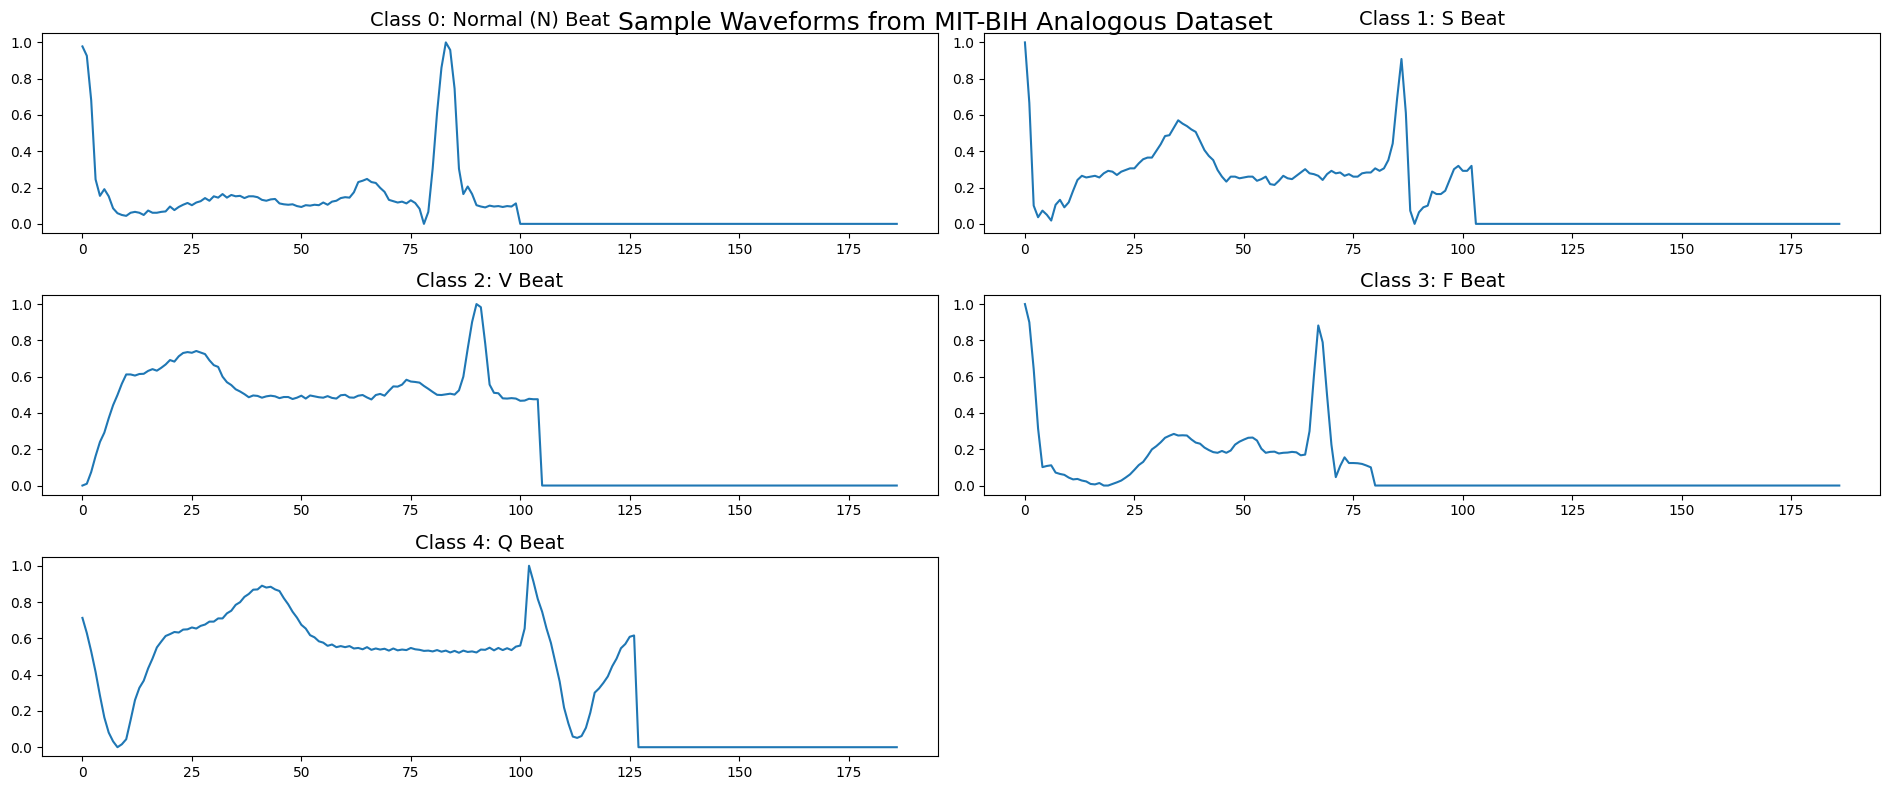


Data shape ready for 1D-CNN:
X_train shape: (87554, 187, 1)
y_train_onehot shape: (87554, 5)


In [28]:
#cell 4 (originally cell 3 before)

# The last column (187) is the label (0-4)
# The first 187 columns (0-186) are the signal data
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# --- Visualize the data---
print("Visualizing the 5 distinct signal classes...")
plt.figure(figsize=(19, 8))
classes = {0: 'Normal (N)', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

for i in range(5):
    idx = np.where(y_train == i)[0][0] # Find the first example of each class
    plt.subplot(3, 2, i+1)
    plt.plot(X_train[idx], label=f'Class {i}')
    plt.title(f'Class {i}: {classes[i]} Beat', fontsize=14)
    plt.tight_layout()

plt.suptitle('Sample Waveforms from MIT-BIH Analogous Dataset', fontsize=18)
plt.show()

# --- Pre-processing for the 1D-CNN ---
# We must reshape the data to (samples, timesteps, features)
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)

# Convert labels to "one-hot" encoding
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print("\nData shape ready for 1D-CNN:")
print("X_train shape:", X_train.shape)
print("y_train_onehot shape:", y_train_onehot.shape)


In [20]:
print("Building the 1D-CNN model architecture...")

model = Sequential ()

#block 1
model.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(187,1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

#block 2
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

#block 3
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

#flatten and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3)) #dropout helps prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

#output layer
#5 units because we have 5 classes. softmax is for multi-class classification
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Building the 1D-CNN model architecture...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 187, 64)        │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 187, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 94, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 94, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 94, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 47, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 47, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 47, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526,789 (2.01 MB)

 Trainable params: 526,149 (2.01 MB)

 Non-trainable params: 640 (2.50 KB)

In [22]:
print("Training the model... This is the main analysis.")

#we train for 15 epochs (passes through the data)
history = model.fit(X_train, y_train_onehot,
                    epochs=15,
                    batch_size=128,
                    validation_data=(X_test, y_test_onehot))
print("Training complete.")

Training the model... This is the main analysis.
Epoch 1/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9168 - loss: 0.3134 - val_accuracy: 0.8762 - val_loss: 0.3689
Epoch 2/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9615 - loss: 0.1509 - val_accuracy: 0.9758 - val_loss: 0.0899
Epoch 3/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9781 - loss: 0.0807 - val_accuracy: 0.9788 - val_loss: 0.0733
Epoch 4/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9814 - loss: 0.0690 - val_accuracy: 0.9790 - val_loss: 0.0818
Epoch 5/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9834 - loss: 0.0578 - val_accuracy: 0.9791 - val_loss: 0.0735
Epoch 6/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9852 - loss: 0.0537 - val_accuracy: 0.9823 - val_loss: 0.0707
Epoch 7/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.9824 - val_loss: 0.0695
Epoch 8/15
685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step -

Evaluating final model performance...
685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0212

--- FINAL RESULTS---
Test Accuracy:  98.52%
Test Loss: 0.0665
--------------------


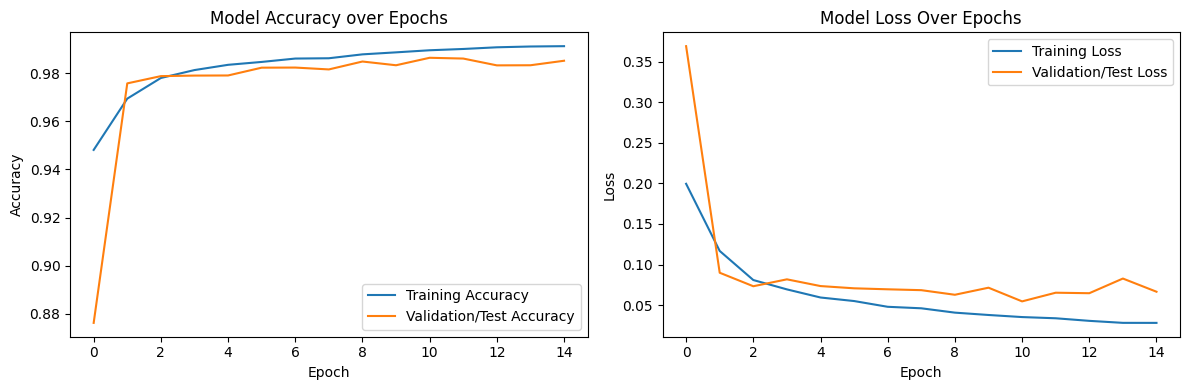


Generating final Confusion Matrix...
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


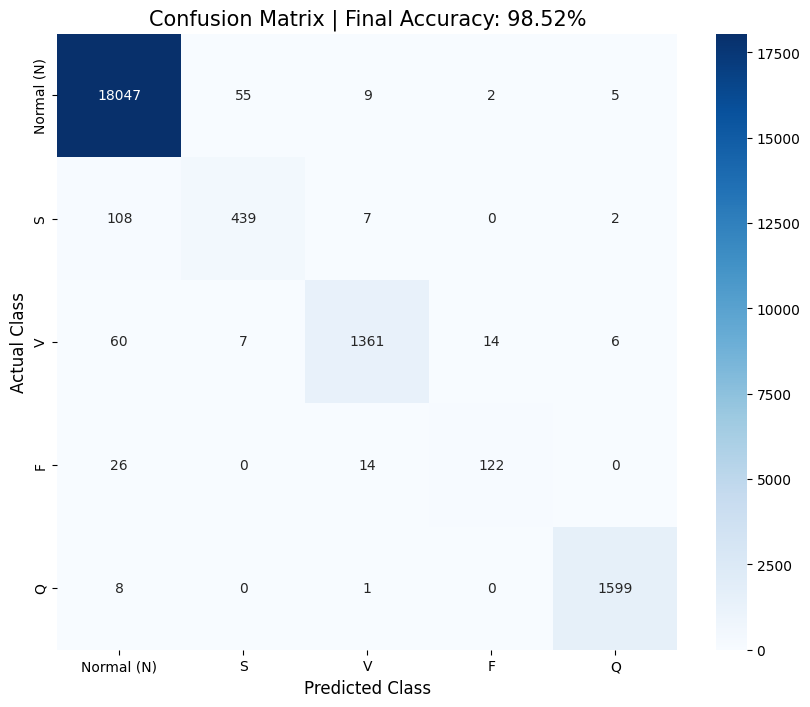

In [26]:
print("Evaluating final model performance...")
loss, accuracy = model.evaluate(X_test, y_test_onehot)

print(f"\n--- FINAL RESULTS---")
print(f"Test Accuracy: {accuracy * 100: .2f}%")
print(f"Test Loss: {loss:.4f}")
print(f"--------------------")

# --- plot the training history
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation/Test Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation/Test Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# --- show a confusion matrix
print("\nGenerating final Confusion Matrix...")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes.values(),
            yticklabels=classes.values())
plt.title(f'Confusion Matrix | Final Accuracy: {accuracy*100:.2f}%', fontsize=15)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()